In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df=pd.read_csv("Ipl Data/deliveries.csv")
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [41]:
df[df["noball_runs"]!=0]     # all the no-ball deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
182,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,1,KM Jadhav,TM Head,MC Henriques,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1440,7,1,Kolkata Knight Riders,Mumbai Indians,3,3,CA Lynn,G Gambhir,JJ Bumrah,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1443,7,1,Kolkata Knight Riders,Mumbai Indians,3,6,CA Lynn,G Gambhir,JJ Bumrah,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
1545,7,1,Kolkata Knight Riders,Mumbai Indians,20,2,MK Pandey,SP Narine,MJ McClenaghan,0,...,0,0,1,0,4,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178120,11412,1,Chennai Super Kings,Mumbai Indians,4,1,SK Raina,SR Watson,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
178166,11412,1,Chennai Super Kings,Mumbai Indians,11,4,AT Rayudu,M Vijay,SL Malinga,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
178219,11412,1,Chennai Super Kings,Mumbai Indians,20,1,MS Dhoni,AT Rayudu,JJ Bumrah,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
178461,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,4,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN


In [46]:
bowlers=df[df["noball_runs"]!=0].bowler   #list of all bowlers who have bowled a no-ball
bowlers

9            A Choudhary
182         MC Henriques
1440           JJ Bumrah
1443           JJ Bumrah
1545      MJ McClenaghan
               ...      
178120           J Yadav
178166        SL Malinga
178219         JJ Bumrah
178461            K Paul
178678          DJ Bravo
Name: bowler, Length: 714, dtype: object

**Counting the total number of no-balls bowled by the bowlers**

In [48]:
df = pd.DataFrame({'Name' : bowlers}) 

# counting the duplicates 
dups = df.pivot_table(index = ['Name'], aggfunc ='size') 

# displaying the duplicate Series 
print(dups)

Name
A Ashish Reddy     2
A Choudhary        1
A Kumble           5
A Mishra          20
A Mithun           9
                  ..
Y Nagar            4
YA Abdulla         1
YS Chahal          6
Yuvraj Singh       1
Z Khan             2
Length: 191, dtype: int64


**Result: the bowler who has bowled the max number of no-balls**

In [9]:
dups[dups==max(dups)]

Name
S Sreesanth    23
dtype: int64

In [15]:
# top 10 bowlers who have bowled most number of no-balls
top_10=dups.sort_values(ascending=False)[:10]
top_10

Name
S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       20
UT Yadav       18
SL Malinga     18
AB Dinda       14
B Lee          13
SR Watson      13
RP Singh       13
dtype: int64

/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Name'>

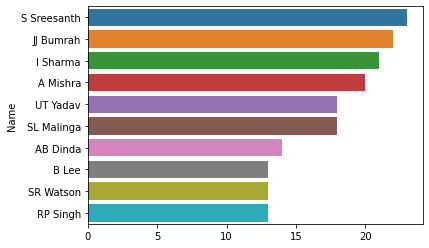

In [39]:
sns.barplot(top_10,top_10.index)